### Import libraries

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from keras import Sequential, Model, optimizers
from keras.layers import add, Dense, Input, Dropout
from keras.losses import *
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

### Load data

In [26]:
from google.colab import files
uploaded = files.upload()

Saving Adult_Care_Data.csv to Adult_Care_Data (1).csv


In [27]:
data = pd.read_csv('Adult_Care_Data.csv')
df = data.drop(['Reporting Year','Reporting Quarter','County','Reporting Organization','Reporting Organization ID'], 1)
print('Features:')
for col in df.columns:
    print(col)
print('\nSize of data:',df.shape)
print('\nData types:\n',df.dtypes)
print('\nNumeric data:')
df.tail()

Features:
Total Capacity (Certified)
Beginning Census
End Census
Male Census
Female Census
# of Residents Age 66-80
# of Residents  Age 81+
Total Admissions
Total Discharges

Size of data: (3311, 9)

Data types:
 Total Capacity (Certified)      int64
Beginning Census              float64
End Census                      int64
Male Census                   float64
Female Census                   int64
# of Residents Age 66-80        int64
# of Residents  Age 81+         int64
Total Admissions              float64
Total Discharges                int64
dtype: object

Numeric data:


,Total Capacity (Certified),Beginning Census,End Census,Male Census,Female Census,# of Residents Age 66-80,# of Residents Age 81+,Total Admissions,Total Discharges
3306,80,75.0,70,15.0,55,10,59,27.0,32
3307,120,91.0,87,28.0,59,31,48,55.0,58
3308,181,175.0,176,58.0,118,71,71,49.0,48
3309,60,43.0,56,18.0,38,8,48,30.0,24
3310,40,25.0,25,NaN,21,7,18,12.0,12


### Filling Missing Values

In [28]:
df.isna().sum()

Total Capacity (Certified)      0
Beginning Census               10
End Census                      0
Male Census                    57
Female Census                   0
# of Residents Age 66-80        0
# of Residents  Age 81+         0
Total Admissions              282
Total Discharges                0
dtype: int64

In [29]:
for col in df.columns:
    mean = round(df[col].mean())
    df[col].fillna(mean,inplace = True)   # replacing missing data with mean of the feature
df.tail()

,Total Capacity (Certified),Beginning Census,End Census,Male Census,Female Census,# of Residents Age 66-80,# of Residents Age 81+,Total Admissions,Total Discharges
3306,80,75.0,70,15.0,55,10,59,27.0,32
3307,120,91.0,87,28.0,59,31,48,55.0,58
3308,181,175.0,176,58.0,118,71,71,49.0,48
3309,60,43.0,56,18.0,38,8,48,30.0,24
3310,40,25.0,25,37.0,21,7,18,12.0,12


### Frequency Plot

Frequency plot:


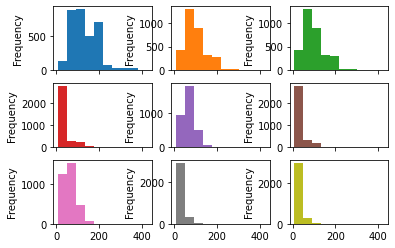

In [30]:
df.plot.hist(subplots = True, legend = False, layout = (3,3))
print('Frequency plot:')

### Input/output Data

In [31]:
X = df.drop('End Census',1)     ## input set is metrics except output feature ('End Census')
Y = df['End Census']            ## output is 'End Census'
print('Input Shape:',X.shape)
print('Output shape:',Y.shape)

Input Shape: (3311, 8)
Output shape: (3311,)


### Train/Test split

Training data size: (2648,)
Testing data size: (663,)


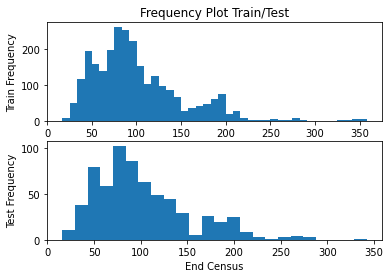

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)  # 20% test, 80% train

plt.subplot(2,1,1)
hist = plt.hist(y_train, bins = 'auto')
plt.title('Frequency Plot Train/Test')
plt.ylabel('Train Frequency')

plt.subplot(2,1,2)
plt.hist(y_test, bins = 'auto')
plt.xlabel('End Census')
plt.ylabel('Test Frequency')
print('Training data size:',y_train.shape)
print('Testing data size:',y_test.shape)

### Least Square Linear Regression Model

R-Square: 0.9957862437517474
MSE: 11.422333522417597
cross validation rsquare score:
 [0.99469864 0.99655208 0.996062   0.9957349 ]
actual output: [ 96 104 179 ... 134  67 131]
predictions: [ 95 103 178 ... 133  64 131]
train rquare score: 0.9958873065535047


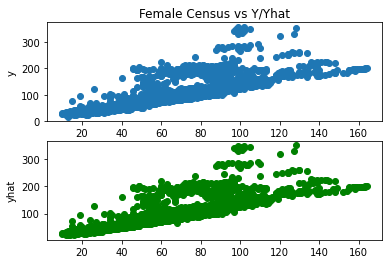

In [37]:
lr = LinearRegression()
yhat_cv = cross_val_predict(lr, x_train, y_train, cv = 4)  ## cross validation predictions, kFolds = 4
score_cv = cross_val_score(lr, x_train, y_train, cv = 4)   ## cross validation score, kFOlds = 4
R2 = r2_score(y_train, yhat_cv)
MSE = mean_squared_error(y_train, yhat_cv)

lr.fit(x_train, y_train)
yhat_train = lr.predict(x_train)
score_train = lr.score(x_train, y_train)
plt.subplot(2,1,1)
plt.scatter(x_train['Female Census'], y_train)
plt.title('Female Census vs Y/Yhat')
plt.ylabel('y')
plt.subplot(2,1,2)
plt.scatter(x_train['Female Census'], yhat_cv, color = 'g')
plt.ylabel('yhat')
print('R-Square:', R2)
print('MSE:', MSE)
print('cross validation rsquare score:\n',score_cv)
print('actual output:',y_train.values)
print('predictions:',yhat_cv.astype('int'))
print('train rquare score:',score_train)

### Test Linear Regression Model

R-Square: 0.9928850484175785
MSE: 18.640511518848502
test score: 0.9928850484175785
actual output: [ 47 251  34 114 168]
predictions: [ 45 249  31 112 169]
Intercept: -2.519214986059154
Coefficients: [ 0.01983911  0.2865915   0.66237153  0.68329426  0.05121587  0.02724796
  0.09807448 -0.0942564 ]


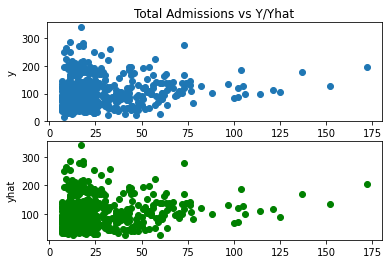

In [39]:
yhat_test = lr.predict(x_test)            # predictions on test data
R2 = r2_score(y_test, yhat_test)
MSE = mean_squared_error(y_test, yhat_test)
print('R-Square:', R2)
print('MSE:', MSE)
test_score = lr.score(x_test, y_test)      # test score
plt.subplot(2,1,1)
plt.scatter(x_test['Total Admissions'], y_test)
plt.title('Total Admissions vs Y/Yhat')
plt.ylabel('y')
plt.subplot(2,1,2)
plt.scatter(x_test['Total Admissions'], yhat_test, color = 'g')
plt.ylabel('yhat')
print('test score:',test_score)
print('actual output:',y_test.values[:5])
print('predictions:',yhat_test.astype('int')[:5])
print('Intercept:',lr.intercept_)
print('Coefficients:',lr.coef_)

### 2 Layers Deep Neural Network

In [56]:
X = Input(shape = (8,))                            ## input layer with metrics size number_of_data_points * 8
layer1 = Dense(1028, activation = 'relu')(X)        ## first dense layer
drop1 = Dropout(0.2)(layer1)                        ## dropout to omit over fitting
layer2 = Dense(512, activation = 'relu')(drop1)       ## 2nd dense
drop2 = Dropout(0.1)(layer2)                          ## 2nd dropout
layer3 = Dense(1, activation = 'linear')(drop2)
model1 = Model(inputs = X, outputs = layer3)         #model
model1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 1028)              9252      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1028)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               526848    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 513       
Total params: 536,613
Trainable params: 536,613
Non-trainable params: 0
_____________________________________________________

In [57]:
callback = EarlyStopping(monitor='val_loss', patience=5)
adam = optimizers.Adam(lr = 0.0001)
model1.compile(optimizer = adam, loss = mse, metrics = ['mae','mse'])
'''fitting the model with 20% validation'''
model1_train_history = model1.fit(x_train, y_train, batch_size=10, epochs=100, validation_split = 0.2, callbacks = [callback])

Train on 2118 samples, validate on 530 samples
Epoch 1/100
2118/2118 [==============================] - 2s 841us/step - loss: 513.2078 - mae: 11.8270 - mse: 513.2080 - val_loss: 27.8162 - val_mae: 3.6852 - val_mse: 27.8162
Epoch 2/100
2118/2118 [==============================] - 2s 755us/step - loss: 59.8851 - mae: 5.6708 - mse: 59.8851 - val_loss: 22.1142 - val_mae: 3.2087 - val_mse: 22.1142
Epoch 3/100
2118/2118 [==============================] - 2s 771us/step - loss: 53.6701 - mae: 5.3735 - mse: 53.6701 - val_loss: 16.2871 - val_mae: 2.7469 - val_mse: 16.2871
Epoch 4/100
2118/2118 [==============================] - 2s 755us/step - loss: 50.4273 - mae: 5.2479 - mse: 50.4273 - val_loss: 13.2344 - val_mae: 2.4511 - val_mse: 13.2344
Epoch 5/100
2118/2118 [==============================] - 2s 779us/step - loss: 42.8416 - mae: 4.7690 - mse: 42.8416 - val_loss: 13.4950 - val_mae: 2.6852 - val_mse: 13.4950
Epoch 6/100
2118/2118 [==============================] - 2s 777us/step - loss: 41.104

Rsquared score on train is: 0.9968156079036188
Rsquared score on test is: 0.9947972607054482


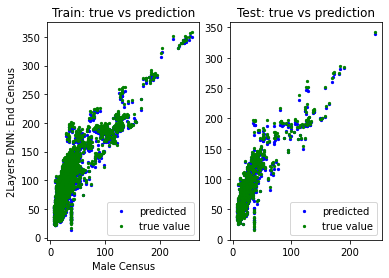

In [58]:
ypred_model1 = model1.predict(x_train)
yhat_model1 = model1.predict(x_test)
plt.subplot(1,2,1)
plt.scatter(x_train['Male Census'], ypred_model1, s=5, color = 'b', label ='predicted')
plt.scatter(x_train['Male Census'], y_train,s=5, color = 'g', label = 'true value')
plt.title('Train: true vs prediction'), plt.xlabel('Male Census'), plt.ylabel('2Layers DNN: End Census')
plt.legend(loc = 4)
plt.subplot(1,2,2)
plt.scatter(x_test['Male Census'], yhat_model1,s=5, color = 'b', label ='predicted')
plt.scatter(x_test['Male Census'], y_test,s=5, color = 'g', label = 'true value')
plt.title('Test: true vs prediction')
plt.legend(loc = 4)
print('Rsquared score on train is:',r2_score(y_train, ypred_model1))
print('Rsquared score on test is:',r2_score(y_test, yhat_model1))

Text(0, 0.5, 'MAE')

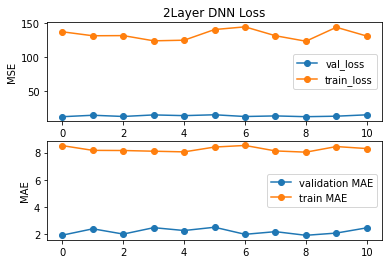

In [54]:
plt.subplot(2,1,1)
plt.plot(range(len(model1_train_history.history['val_loss'])),model1_train_history.history['val_loss'],'-o', label = 'val_loss')
plt.plot(range(len(model1_train_history.history['loss'])),model1_train_history.history['loss'],'-o', label = 'train_loss')
plt.legend(loc = 'center right', fontsize = 10)
plt.ylabel('MSE'), plt.title('2Layer DNN Loss')
plt.subplot(2,1,2)
plt.plot(range(len(model1_train_history.history['val_mae'])),model1_train_history.history['val_mae'],'-o', label = 'validation MAE')
plt.plot(range(len(model1_train_history.history['mae'])),model1_train_history.history['mae'],'-o', label = 'train MAE')
plt.legend(loc = 'center right', fontsize = 10)
plt.ylabel('MAE')

### 3 Layers Deep Neural Network

In [60]:
X = Input(shape = (8,)) 
layer1 = Dense(128, activation = 'relu')(X)
drop1 = Dropout(0.2)(layer1)
layer2 = Dense(32, activation = 'relu')(drop1)
drop2 = Dropout(0.2)(layer2)
layer3 = Dense(8, activation = 'relu')(drop2)          # 3rd dense layer
drop3 = Dropout(0.2)(layer3)                             # 3rd layer dropout
layer4 = Dense(1, activation = 'linear')(drop3)
model2 = Model(inputs = X, outputs = layer4)           #model
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               1152      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_6 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 264       
_________________________________________________________________
dropout_7 (Dropout)          (None, 8)                 0   

In [67]:
callback = EarlyStopping(monitor='val_loss', patience=10)
adam = optimizers.Adam(lr = 0.00005)
model2.compile(optimizer = adam, loss = mse, metrics=['mse', 'mae'])
'''fit the model with 20% validation'''
model2_train_history = model2.fit(x_train, y_train, batch_size=100, epochs=100, validation_split = 0.2, callbacks = [callback])

Train on 2118 samples, validate on 530 samples
Epoch 1/100
2118/2118 [==============================] - 0s 106us/step - loss: 1298.4681 - mse: 1298.4681 - mae: 25.7835 - val_loss: 194.5914 - val_mse: 194.5914 - val_mae: 11.9404
Epoch 2/100
2118/2118 [==============================] - 0s 23us/step - loss: 1230.9128 - mse: 1230.9126 - mae: 25.2209 - val_loss: 227.7666 - val_mse: 227.7666 - val_mae: 13.0089
Epoch 3/100
2118/2118 [==============================] - 0s 24us/step - loss: 1316.4129 - mse: 1316.4128 - mae: 25.8576 - val_loss: 184.7385 - val_mse: 184.7385 - val_mae: 11.6561
Epoch 4/100
2118/2118 [==============================] - 0s 23us/step - loss: 1290.1244 - mse: 1290.1244 - mae: 25.2835 - val_loss: 160.2692 - val_mse: 160.2692 - val_mae: 10.8671
Epoch 5/100
2118/2118 [==============================] - 0s 24us/step - loss: 1234.3833 - mse: 1234.3834 - mae: 25.3960 - val_loss: 173.0147 - val_mse: 173.0147 - val_mae: 11.3759
Epoch 6/100
2118/2118 [=============================

Rsquared score on train is: 0.9289232923499838
Rsquared score on test is: 0.9218992683559227


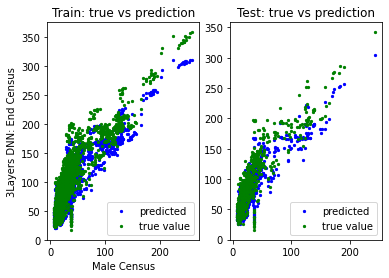

In [68]:
ypred_model2 = model2.predict(x_train)
yhat_model2 = model2.predict(x_test)
plt.xlabel('aa')
plt.subplot(1,2,1)
plt.scatter(x_train['Male Census'], ypred_model2,s=5, color = 'b', label ='predicted')
plt.scatter(x_train['Male Census'], y_train,s=5, color = 'g', label = 'true value')
plt.title('Train: true vs prediction')
plt.legend(loc = 4), plt.ylabel('3Layers DNN: End Census'), plt.xlabel('Male Census')
plt.subplot(1,2,2)
plt.scatter(x_test['Male Census'], yhat_model2,s=5, color = 'b', label ='predicted')
plt.scatter(x_test['Male Census'], y_test,s=5, color = 'g', label = 'true value')
plt.title('Test: true vs prediction')
plt.legend(loc = 4)
print('Rsquared score on train is:',r2_score(y_train, ypred_model2))
print('Rsquared score on test is:',r2_score(y_test, yhat_model2))

Loss per epoch: 3 layers DNN:


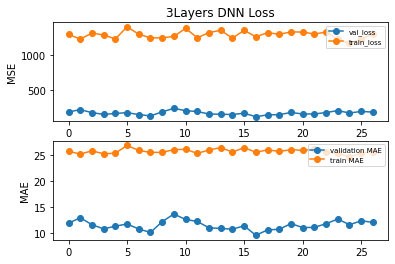

In [69]:
plt.subplot(2,1,1)
plt.plot(range(len(model2_train_history.history['val_loss'])),model2_train_history.history['val_loss'],'-o', label = 'val_loss')
plt.plot(range(len(model2_train_history.history['loss'])),model2_train_history.history['loss'],'-o', label = 'train_loss')
plt.legend(loc = 1, fontsize = 7)
plt.ylabel('MSE'), plt.title('3Layers DNN Loss')
plt.subplot(2,1,2)
plt.plot(range(len(model2_train_history.history['val_mae'])),model2_train_history.history['val_mae'],'-o', label = 'validation MAE')
plt.plot(range(len(model2_train_history.history['mae'])),model2_train_history.history['mae'],'-o', label = 'train MAE')
plt.legend(loc = 1, fontsize = 7)
plt.ylabel('MAE')
print('Loss per epoch: 3 layers DNN:')

### Changing Hyper-Parameters

In [70]:
'''simple 3 layers DNN'''
X = Input(shape = (8,)) 
layer1 = Dense(256, activation = 'relu')(X)
layer2 = Dense(128, activation = 'relu')(layer1)
layer3 = Dense(64, activation = 'relu')(layer2)
layer4 = Dense(1, activation = 'linear')(layer3)
model = Model(inputs = X, outputs = layer4)
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               2304      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 65        
Total params: 43,521
Trainable params: 43,521
Non-trainable params: 0
_________________________________________________________________


In [0]:
learning_rates = [0.001,0.01,0.1]  # learning rates to iterate through
sgd, adagrad = [], []             # solvers sets
for r in learning_rates:
    sgd.append(optimizers.SGD(r))
    adagrad.append(optimizers.Adagrad(r))
solvers = sgd + adagrad
callback = EarlyStopping(monitor='val_loss', patience=10)
model_train_history = []                                       # to store all the results at every fit

'''fit for all the hyperparameters'''
for s in solvers:
    model.compile(optimizer = s, loss = mse, metrics=['mse', 'mae'])
    model_train_history.append(model.fit(x_train, y_train, batch_size=10, epochs=100, validation_split = 0.2, callbacks = [callback]))

Train on 2118 samples, validate on 530 samples
Epoch 1/100
2118/2118 [==============================] - 0s 132us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 2/100
2118/2118 [==============================] - 0s 113us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 3/100
2118/2118 [==============================] - 0s 106us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 4/100
2118/2118 [==============================] - 0s 121us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 5/100
2118/2118 [==============================] - 0s 117us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 6/100
2118/2118 [==============================] - 0s 100us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 7/100
2118/2118 [========================

2118/2118 [==============================] - 0s 108us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 4/100
2118/2118 [==============================] - 0s 107us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 5/100
2118/2118 [==============================] - 0s 106us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 6/100
2118/2118 [==============================] - 0s 97us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 7/100
2118/2118 [==============================] - 0s 97us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 8/100
2118/2118 [==============================] - 0s 95us/step - loss: nan - mse: nan - mae: nan - val_loss: nan - val_mse: nan - val_mae: nan
Epoch 9/100
2118/2118 [==============================] - 0s 97us/step - loss: nan - mse: nan - mae: nan - val